# Customer Segmentation Dataset Analysis

#### We import our libraries here

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import sklearn

#### A quick look at the dataset

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head(n=5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Here we drop the CustomerID as it won't be necessary, as well as separate our data between male and female for some data analysis.

In [3]:
# The customer's ID will be unnecessary
dataset = dataset.drop(labels=['CustomerID'], axis=1)

male_df = dataset[dataset['Gender'] == 'Male']
female_df = dataset[dataset['Gender'] == 'Female']

# shape of our data
dataset.shape

(200, 4)

#### Here we take a closer look at our data separated by gender. Both cases seem pretty close to each other that we can infer gender isn't relevant.

In [4]:
male_df.drop(labels=['Gender'], axis=1).agg(['min', 'max', 'std', 'mad', 'mean', 'median', 'var'])

,Age,Annual Income (k$),Spending Score (1-100)
min,18.000000,15.000000,1.000000
max,70.000000,137.000000,97.000000
std,15.514812,26.638373,27.896770
mad,13.030475,20.818182,22.692665
mean,39.806818,62.227273,48.511364
median,37.000000,62.500000,50.000000
var,240.709378,709.602926,778.229754


In [5]:
female_df.drop(labels=['Gender'], axis=1).agg(['min', 'max', 'std', 'mad', 'mean', 'median', 'var'])

,Age,Annual Income (k$),Spending Score (1-100)
min,18.000000,16.000000,5.000000
max,68.000000,126.000000,99.000000
std,12.644095,26.011952,24.114950
mad,10.544324,21.049107,19.457270
mean,38.098214,59.250000,51.526786
median,35.000000,60.000000,50.000000
var,159.873150,676.621622,581.530808


Text(0.5, 1.0, 'Spending Score (1-100)')

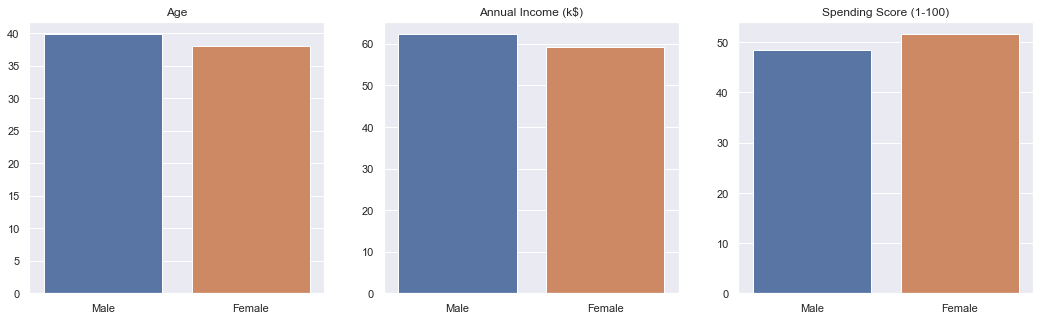

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(['Male', 'Female'], [male_df['Age'].mean(), female_df['Age'].mean()], ax=axs[0])
axs[0].set_title('Age')
sns.barplot(['Male', 'Female'], [male_df['Annual Income (k$)'].mean(), female_df['Annual Income (k$)'].mean()], ax=axs[1])
axs[1].set_title('Annual Income (k$)')
sns.barplot(['Male', 'Female'], [male_df['Spending Score (1-100)'].mean(), female_df['Spending Score (1-100)'].mean()], ax=axs[2])
axs[2].set_title('Spending Score (1-100)')

#### Now to plot our columns against each other to see if we can find any patterns. In this case, the middle graph seems to have pretty well-defined clusters.

Text(0.5, 1.0, 'Age x Spending Score')

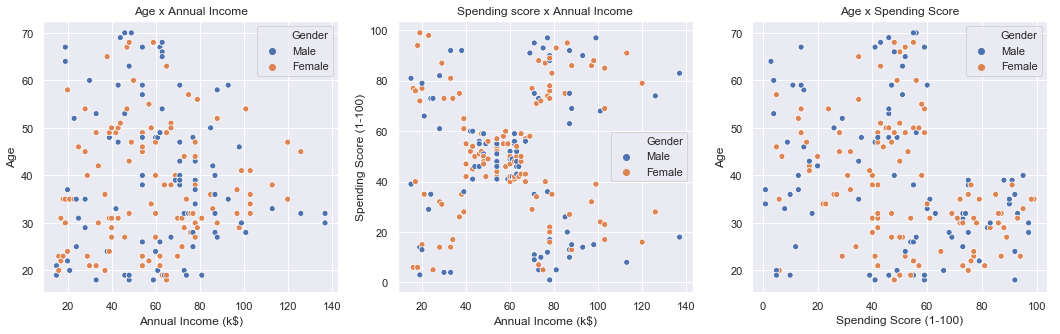

In [7]:
fig, axs2 = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(x='Annual Income (k$)', y='Age', data=dataset, hue='Gender', ax=axs2[0])
axs2[0].set_title('Age x Annual Income')
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=dataset, ax=axs2[1])
axs2[1].set_title('Spending score x Annual Income')
sns.scatterplot(x='Spending Score (1-100)', y='Age', data=dataset, hue='Gender', ax=axs2[2])
axs2[2].set_title('Age x Spending Score')

#### Let's take a look at the distribution of our variables too because why not.

Text(0.5, 1.0, 'Spending Score Distribution')

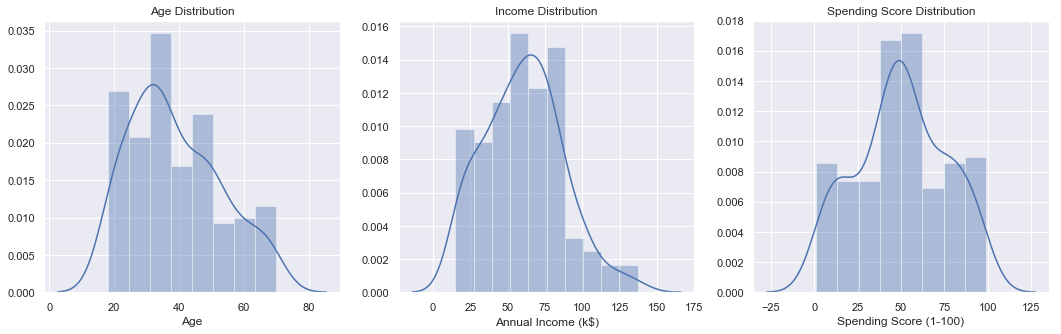

In [8]:
fig, axs3 = plt.subplots(1, 3, figsize=(18, 5))

sns.distplot(dataset['Age'], ax=axs3[0])
axs3[0].set_title('Age Distribution')
sns.distplot(dataset['Annual Income (k$)'], ax=axs3[1])
axs3[1].set_title('Income Distribution')
sns.distplot(dataset['Spending Score (1-100)'], ax=axs3[2])
axs3[2].set_title('Spending Score Distribution')

#### Seeing as we have pretty well defined clusters when plotting Annual Income against the Spending Score, we can use KMeans to classify each data point

In [33]:
from sklearn.cluster import KMeans

points = dataset[['Annual Income (k$)', 'Spending Score (1-100)']]

# we saw 5 distinct groups, so 5 clusters should do
model = KMeans(n_clusters=5).fit(points)

x = [i[1] for i in model.cluster_centers_]
y = [i[0] for i in model.cluster_centers_]

#### The result is that we have 5 distinct groups of points that we can use to classify any new data point

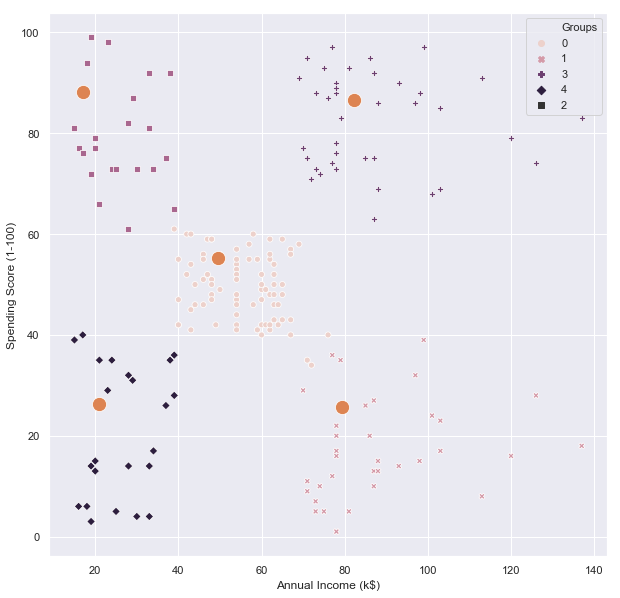

In [34]:
dataset['Groups'] = model.labels_

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Groups', style='Groups', data=dataset, ax=ax)
sns.scatterplot(x=x, y=y, s=200, ax=ax)